# Hypothesis testing 

In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import anderson
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import normaltest
from numpy import mean
from numpy import std

In [2]:
df = pd.read_excel('Final mastersheet.xlsx')

In [3]:
df.head()

,GROUP,AGE,GENDER,EDUCATION,RELIGION,SES,RESIDENCE,FAMILY TYPE,PRE CONNERS INDEX PRE,POST CONNERS INDEX PRE,...,Effect size.1,PRE ADHD Hyperactive-Impulsive PRE,POST ADHD Hyperactive-Impulsive,Effect size.2,PRE Conduct D. PRE,POST Conduct D. POST,Effect size.3,ODD PRE,ODD POST,Effect size.4
0,1,6,M,2,Hindu,M,Urban,J,15,5,...,0.82,8,4,3.25,6,4,0.72,7,6,0.54
1,1,11,F,5,Hindu,M,Urban,N,19,13,...,3.30,9,9,0.00,11,7,1.45,6,7,-0.54
2,1,12,M,7,Muslim,M,Semi Urban,N,12,5,...,2.47,9,2,5.60,4,3,0.36,5,2,1.64
3,1,12,M,6,Hindu,M,Semi Urban,N,12,5,...,3.30,8,2,4.87,4,3,0.36,8,2,3.29
4,1,10,M,6,Hindu,M,Urban,N,13,11,...,0.82,6,5,0.81,6,6,0.00,7,6,0.54


In [4]:
df.describe()

,GROUP,AGE,EDUCATION,PRE CONNERS INDEX PRE,POST CONNERS INDEX PRE,Effect size,PRE CONNERS PERCENTILE (%),POST CONNERS PERCENTILE (%),PRE ADHD Intattentive,POST ADHD Intattentive,Effect size.1,PRE ADHD Hyperactive-Impulsive PRE,POST ADHD Hyperactive-Impulsive,Effect size.2,PRE Conduct D. PRE,POST Conduct D. POST,Effect size.3,ODD PRE,ODD POST,Effect size.4
count,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,1.50000,9.300000,4.475000,13.750000,8.925000,1.712000,95.775000,80.925000,7.150000,5.200000,1.499500,7.400000,5.625000,1.363000,5.550000,4.175000,0.464000,5.050000,3.875000,0.640250
std,0.50637,2.028009,1.617017,3.432499,4.103704,1.868584,6.855608,17.239471,1.424151,2.114662,1.317196,1.354953,2.059219,1.437839,2.707539,2.049234,0.886522,1.852926,1.924038,0.996168
min,1.00000,6.000000,2.000000,5.000000,2.000000,0.000000,64.000000,41.000000,4.000000,0.000000,0.000000,4.000000,2.000000,-0.680000,1.000000,1.000000,-1.450000,2.000000,1.000000,-1.090000
25%,1.00000,8.000000,3.000000,12.000000,5.750000,0.520000,97.000000,69.250000,6.000000,4.000000,0.660000,6.000000,4.000000,0.000000,4.000000,3.000000,0.000000,3.000000,2.000000,0.000000
50%,1.50000,9.000000,4.000000,14.000000,9.000000,1.180000,99.000000,87.000000,7.000000,5.000000,1.075000,8.000000,5.000000,0.810000,5.000000,4.000000,0.360000,5.000000,4.000000,0.540000
75%,2.00000,11.000000,6.000000,16.250000,12.000000,2.310000,99.000000,97.000000,8.000000,7.000000,2.470000,8.000000,8.000000,2.430000,7.250000,6.000000,0.730000,6.250000,5.000000,1.090000
max,2.00000,12.000000,7.000000,20.000000,19.000000,11.000000,99.000000,99.000000,10.000000,9.000000,4.950000,10.000000,9.000000,5.600000,12.000000,9.000000,3.670000,8.000000,8.000000,3.290000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 25 columns):
GROUP                                 40 non-null int64
AGE                                   40 non-null int64
GENDER                                40 non-null object
EDUCATION                             40 non-null int64
RELIGION                              40 non-null object
SES                                   40 non-null object
RESIDENCE                             40 non-null object
FAMILY TYPE                           40 non-null object
PRE CONNERS INDEX PRE                 40 non-null int64
POST CONNERS INDEX PRE                40 non-null int64
Effect size                           40 non-null float64
PRE CONNERS PERCENTILE (%)            40 non-null int64
POST CONNERS PERCENTILE (%)           40 non-null int64
PRE ADHD Intattentive                 40 non-null int64
POST ADHD Intattentive                40 non-null int64
Effect size.1                         40 non-null 

# Visualing the data according to the categorical variables

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f61ff6be3c8>,
      dtype=object)

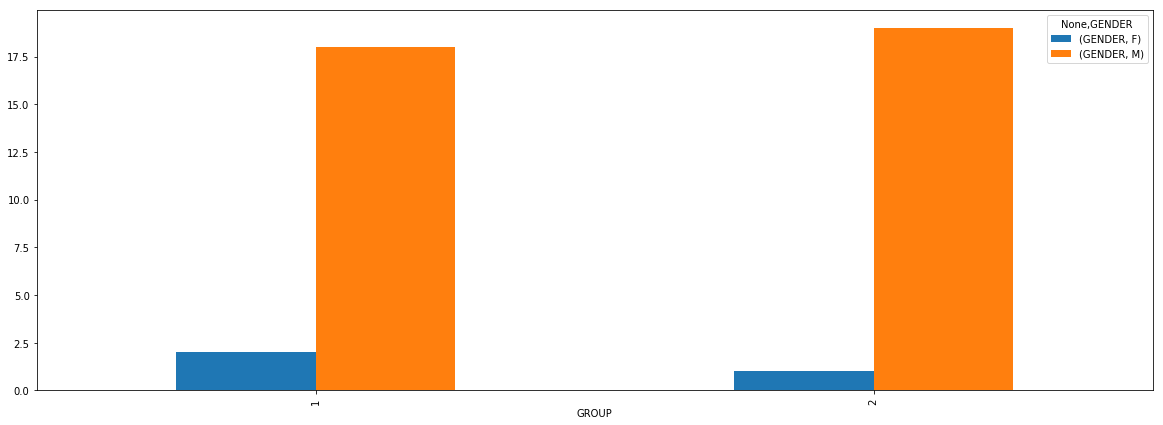

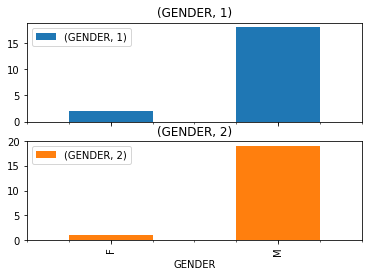

In [6]:
gen = df.groupby(['GROUP', 'GENDER'])
gen_df = gen.agg({'GENDER':'count'})
a = gen_df.unstack(level=1)
a.transpose()
a.plot(kind='bar', figsize=(20, 7))
gen_df.unstack(level=0).plot(kind='bar', subplots=True,)

We are going to take different random variables for statistical testing:

1. Effect_1_without_music
2. Effect_1_with_music
3. Effect_2_without_music
4. Effect_2_with_music
5. Effect_3_without_music
6. Effect_3_with_music
7. Effect_4_without_music
8. Effect_4_with_music
9. Effect_5_without_music
10. Effect_5_with_music

First we will check the normality of afore mentioned variables. Accordingly, hypothesis testing will be conducted using a parametric approach for the normality distributed random variables and a non parametric approach for the remaining variables. 

An important decision point when working with a sample of data is whether to use parametric or nonparametric statistical methods.

Parametric statistical methods assume that the data has a known and specific distribution, often a Gaussian distribution. If a data sample is not Gaussian, then the assumptions of parametric statistical tests are violated and nonparametric statistical methods must be used.

# Checking the normality of the variables

## Lets make different variables for statistical tests

In [7]:
group_1 = df.groupby('GROUP')
group_1.first()
Group1 = group_1.get_group(1)
Group2 = group_1.get_group(2)

In [8]:
Effect_1_with_music = Group1['Effect size']
Effect_1_without_music = Group2['Effect size']
Effect_2_with_music = Group1['Effect size.1']
Effect_2_without_music = Group2['Effect size.1']
Effect_3_with_music = Group1['Effect size.2']
Effect_3_without_music = Group2['Effect size.2']
Effect_4_with_music = Group1['Effect size.3']
Effect_4_without_music = Group2['Effect size.3']
Effect_5_with_music = Group1['Effect size.4']
Effect_5_without_music = Group2['Effect size.4']

# Statistical Normality Tests

There are many statistical tests that we can use to quantify whether a sample of data looks as though it was drawn from a Gaussian distribution.

Each test makes different assumptions and considers different aspects of the data.

We will look at 3 commonly used tests in this section that you can apply to your own data samples.

Each test will return at least two things:

Statistic: A quantity calculated by the test that can be interpreted in the context of the test via comparing it to critical values from the distribution of the test statistic.

p-value: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.

Each test calculates a test-specific statistic. This statistic can aid in the interpretation of the result, although it may require a deeper proficiency with statistics and a deeper knowledge of the specific statistical test. Instead, the p-value can be used to quickly and accurately interpret the statistic in practical applications.

The tests assume that that the sample was drawn from a Gaussian distribution. Technically this is called the null hypothesis, or H0. A threshold level is chosen called alpha, typically 5% (or 0.05), that is used to interpret the p-value.

In the SciPy implementation of these tests, you can interpret the p value as follows.

p <= alpha: reject H0, not normal.
p > alpha: fail to reject H0, normal.
This means that, in general, we are seeking results with a larger p-value to confirm that our sample was likely drawn from a Gaussian distribution.

A result above 5% does not mean that the null hypothesis is true. It means that it is very likely true given available evidence. The p-value is not the probability of the data fitting a Gaussian distribution; it can be thought of as a value that helps us interpret the statistical test.

# All tests are in sequence...
Effect_1_without_music,
Effect_2_with_music,
Effect_2_without_music,
Effect_3_with_music,
Effect_3_without_music, 
Effect_4_with_music, 
Effect_4_without_music, 
Effect_5_with_music, 
Effect_5_without_music respectiviely

# Normality tests in sequence

# 1. Quantile-Quantile Plot

This plot generates its own sample of the idealized distribution that we are comparing with, in this case the Gaussian distribution. The idealized samples are divided into groups (e.g. 5), called quantiles. Each data point in the sample is paired with a similar member from the idealized distribution at the same cumulative distribution.

The resulting points are plotted as a scatter plot with the idealized value on the x-axis and the data sample on the y-axis.

A perfect match for the distribution will be shown by a line of dots on a 45-degree angle from the bottom left of the plot to the top right. Often a line is drawn on the plot to help make this expectation clear. Deviations by the dots from the line shows a deviation from the expected distribution.

# 2. Shapiro-Wilk Test

The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution, named for Samuel Shapiro and Martin Wilk.

In practice, the Shapiro-Wilk test is believed to be a reliable test of normality, although there is some suggestion that the test may be suitable for smaller samples of data, e.g. thousands of observations or fewer.

The shapiro() SciPy function will calculate the Shapiro-Wilk on a given dataset. The function returns both the W-statistic calculated by the test and the p-value.

# 3. D’Agostino’s K^2 Test

The D’Agostino’s K^2 test calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution, named for Ralph D’Agostino.

Skew is a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the distribution.
Kurtosis quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality.

# 4. Anderson-Darling Test 

Anderson-Darling Test is a statistical test that can be used to evaluate whether a data sample comes from one of among many known data samples, named for Theodore Anderson and Donald Darling.

It can be used to check whether a data sample is normal. The test is a modified version of a more sophisticated nonparametric goodness-of-fit statistical test called the Kolmogorov-Smirnov test.

A feature of the Anderson-Darling test is that it returns a list of critical values rather than a single p-value. This can provide the basis for a more thorough interpretation of the result.

### Effect_1_with_music

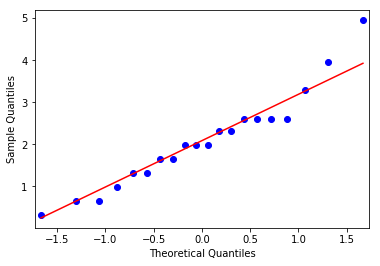

In [9]:
# q-q plot
qqplot(Effect_1_with_music, line='s')
pyplot.show()

In [10]:
# normality test
stat, p = shapiro(Effect_1_with_music)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.950, p=0.368
Sample looks Gaussian (fail to reject H0)


In [11]:
# normality test
stat, p = normaltest(Effect_1_with_music)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=3.457, p=0.178
Sample looks Gaussian (fail to reject H0)


In [12]:
# normality test
result = anderson(Effect_1_with_music)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.356
15.000: 0.506, data looks normal (fail to reject H0)
10.000: 0.577, data looks normal (fail to reject H0)
5.000: 0.692, data looks normal (fail to reject H0)
2.500: 0.807, data looks normal (fail to reject H0)
1.000: 0.960, data looks normal (fail to reject H0)


### Effect_1_without_music

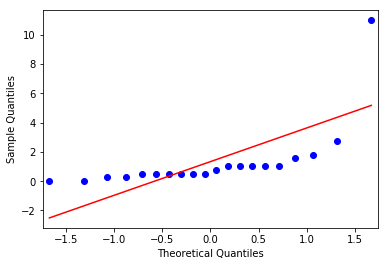

In [13]:
# q-q plot
qqplot(Effect_1_without_music, line='s')
pyplot.show()

In [14]:
# normality test
stat, p = shapiro(Effect_1_without_music)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
    
# normality test
stat, p = normaltest(Effect_1_without_music)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
    
# normality test
result = anderson(Effect_1_without_music)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))    


Statistics=0.465, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=45.958, p=0.000
Sample does not look Gaussian (reject H0)
Statistic: 3.879
15.000: 0.506, data does not look normal (reject H0)
10.000: 0.577, data does not look normal (reject H0)
5.000: 0.692, data does not look normal (reject H0)
2.500: 0.807, data does not look normal (reject H0)
1.000: 0.960, data does not look normal (reject H0)


### Effect_2_with_music

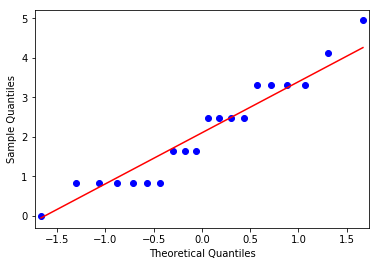

In [15]:
qqplot(Effect_2_with_music, line='s')
pyplot.show()

In [16]:
# normality test
stat, p = shapiro(Effect_2_with_music)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
    
# normality test
stat, p = normaltest(Effect_2_with_music)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
    
# normality test
result = anderson(Effect_2_with_music)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))    


Statistics=0.932, p=0.172
Sample looks Gaussian (fail to reject H0)
Statistics=0.959, p=0.619
Sample looks Gaussian (fail to reject H0)
Statistic: 0.611
15.000: 0.506, data does not look normal (reject H0)
10.000: 0.577, data does not look normal (reject H0)
5.000: 0.692, data looks normal (fail to reject H0)
2.500: 0.807, data looks normal (fail to reject H0)
1.000: 0.960, data looks normal (fail to reject H0)


### Effect_2_without_music

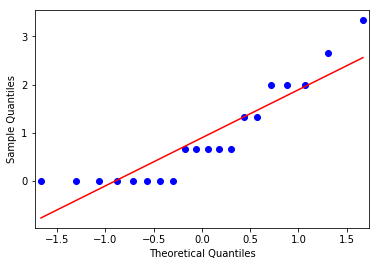

In [17]:
qqplot(Effect_2_without_music, line='s')
pyplot.show()

In [18]:
# normality test
stat, p = shapiro(Effect_2_without_music)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
    
# normality test
stat, p = normaltest(Effect_2_without_music)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
    
# normality test
result = anderson(Effect_2_without_music)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))    


Statistics=0.833, p=0.003
Sample does not look Gaussian (reject H0)
Statistics=3.847, p=0.146
Sample looks Gaussian (fail to reject H0)
Statistic: 1.285
15.000: 0.506, data does not look normal (reject H0)
10.000: 0.577, data does not look normal (reject H0)
5.000: 0.692, data does not look normal (reject H0)
2.500: 0.807, data does not look normal (reject H0)
1.000: 0.960, data does not look normal (reject H0)


### Effect_3_with_music

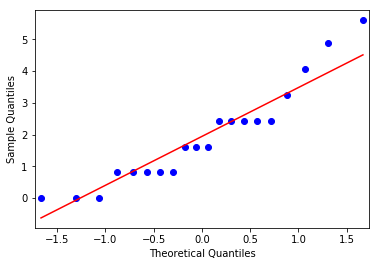

In [19]:
qqplot(Effect_3_with_music, line='s')
pyplot.show()

In [20]:
# normality test
stat, p = shapiro(Effect_3_with_music)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
    
# normality test
stat, p = normaltest(Effect_3_with_music)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
    
# normality test
result = anderson(Effect_3_with_music)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))   

Statistics=0.911, p=0.065
Sample looks Gaussian (fail to reject H0)
Statistics=3.022, p=0.221
Sample looks Gaussian (fail to reject H0)
Statistic: 0.643
15.000: 0.506, data does not look normal (reject H0)
10.000: 0.577, data does not look normal (reject H0)
5.000: 0.692, data looks normal (fail to reject H0)
2.500: 0.807, data looks normal (fail to reject H0)
1.000: 0.960, data looks normal (fail to reject H0)


### Effect_3_without_music

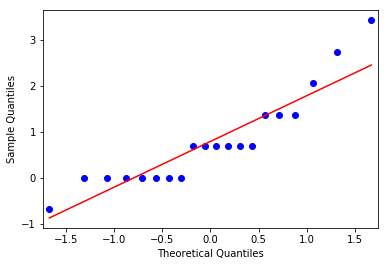

In [21]:
qqplot(Effect_3_without_music, line='s')
pyplot.show()

In [22]:
# normality test
stat, p = shapiro(Effect_3_without_music)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
    
# normality test
stat, p = normaltest(Effect_3_without_music)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
    
# normality test
result = anderson(Effect_3_without_music)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))   

Statistics=0.870, p=0.012
Sample does not look Gaussian (reject H0)
Statistics=6.740, p=0.034
Sample does not look Gaussian (reject H0)
Statistic: 1.079
15.000: 0.506, data does not look normal (reject H0)
10.000: 0.577, data does not look normal (reject H0)
5.000: 0.692, data does not look normal (reject H0)
2.500: 0.807, data does not look normal (reject H0)
1.000: 0.960, data does not look normal (reject H0)


### Effect_4_with_music

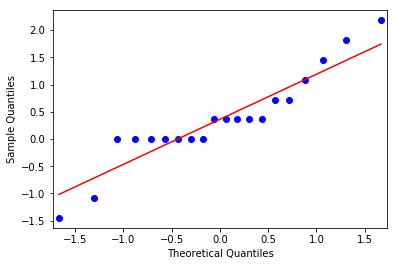

In [23]:
qqplot(Effect_4_with_music, line='s')
pyplot.show()

In [24]:
# normality test
stat, p = shapiro(Effect_4_with_music)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
    
# normality test
stat, p = normaltest(Effect_4_with_music)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
    
# normality test
result = anderson(Effect_4_with_music)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))  

Statistics=0.918, p=0.091
Sample looks Gaussian (fail to reject H0)
Statistics=1.289, p=0.525
Sample looks Gaussian (fail to reject H0)
Statistic: 0.875
15.000: 0.506, data does not look normal (reject H0)
10.000: 0.577, data does not look normal (reject H0)
5.000: 0.692, data does not look normal (reject H0)
2.500: 0.807, data does not look normal (reject H0)
1.000: 0.960, data looks normal (fail to reject H0)


### Effect_4_without_music

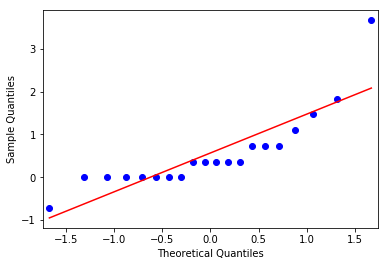

In [25]:
qqplot(Effect_4_without_music, line='s')
pyplot.show()

In [26]:
# normality test
stat, p = shapiro(Effect_4_without_music)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
    
# normality test
stat, p = normaltest(Effect_4_without_music)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
    
# normality test
result = anderson(Effect_4_without_music)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))   

Statistics=0.782, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=21.478, p=0.000
Sample does not look Gaussian (reject H0)
Statistic: 1.534
15.000: 0.506, data does not look normal (reject H0)
10.000: 0.577, data does not look normal (reject H0)
5.000: 0.692, data does not look normal (reject H0)
2.500: 0.807, data does not look normal (reject H0)
1.000: 0.960, data does not look normal (reject H0)


### Effect_5_with_music 

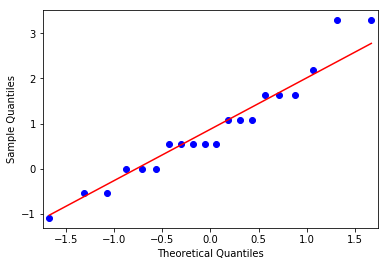

In [27]:
qqplot(Effect_5_with_music, line='s')
pyplot.show()

In [28]:
# normality test
stat, p = shapiro(Effect_5_with_music)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
    
# normality test
stat, p = normaltest(Effect_5_with_music)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
    
# normality test
result = anderson(Effect_5_with_music)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv)) 

Statistics=0.945, p=0.303
Sample looks Gaussian (fail to reject H0)
Statistics=1.648, p=0.439
Sample looks Gaussian (fail to reject H0)
Statistic: 0.431
15.000: 0.506, data looks normal (fail to reject H0)
10.000: 0.577, data looks normal (fail to reject H0)
5.000: 0.692, data looks normal (fail to reject H0)
2.500: 0.807, data looks normal (fail to reject H0)
1.000: 0.960, data looks normal (fail to reject H0)


### Effect_5_without_music

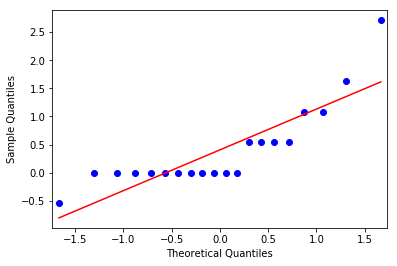

In [29]:
qqplot(Effect_5_without_music, line='s')
pyplot.show()

In [30]:
# normality test
stat, p = shapiro(Effect_5_without_music)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
    
# normality test
stat, p = normaltest(Effect_5_without_music)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
    
# normality test
result = anderson(Effect_5_without_music)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))   

Statistics=0.758, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=16.638, p=0.000
Sample does not look Gaussian (reject H0)
Statistic: 2.017
15.000: 0.506, data does not look normal (reject H0)
10.000: 0.577, data does not look normal (reject H0)
5.000: 0.692, data does not look normal (reject H0)
2.500: 0.807, data does not look normal (reject H0)
1.000: 0.960, data does not look normal (reject H0)


# Since only the music effects variable are following the guassian distribution so we are going to use the non paramatric approach for hypothesis testing

If the data does not have the familiar Gaussian distribution, we must resort to nonparametric version of the significance tests. These tests operate in a similar manner, but are distribution free, requiring that real valued data be first transformed into rank data before the test can be performed.

In this tutorial, you will discover nonparametric statistical tests that you can use to determine if data samples were drawn from populations with the same or different distributions.



The Mann-Whitney U test for comparing independent data samples: the nonparametric version of the Student t-test.
The Wilcoxon signed-rank test for comparing paired data samples: the nonparametric version of the paired Student t-test.
The Kruskal-Wallis H and Friedman tests for comparing more than two data samples: the nonparametric version of the ANOVA and repeated measures ANOVA tests.
Let’s get started.


Nonparametric Statistical Significance Tests
Nonparametric statistics are those methods that do not assume a specific distribution to the data.

Often, they refer to statistical methods that do not assume a Gaussian distribution. They were developed for use with ordinal or interval data, but in practice can also be used with a ranking of real-valued observations in a data sample rather than on the observation values themselves.

A common question about two or more datasets is whether they are different. Specifically, whether the difference between their central tendency (e.g. mean or median) is statistically significant.

This question can be answered for data samples that do not have a Gaussian distribution by using nonparametric statistical significance tests. The null hypothesis of these tests is often the assumption that both samples were drawn from a population with the same distribution, and therefore the same population parameters, such as mean or median.

If after calculating the significance test on two or more samples the null hypothesis is rejected, it indicates that there is evidence to suggest that samples were drawn from different populations, and in turn the difference between sample estimates of population parameters, such as means or medians may be significant.

These tests are often used on samples of model skill scores in order to confirm that the difference in skill between machine learning models is significant.

In general, each test calculates a test statistic, that must be interpreted with some background in statistics and a deeper knowledge of the statistical test itself. Tests also return a p-value that can be used to interpret the result of the test. The p-value can be thought of as the probability of observing the two data samples given the base assumption (null hypothesis) that the two samples were drawn from a population with the same distribution.

The p-value can be interpreted in the context of a chosen significance level called alpha. A common value for alpha is 5% or 0.05. If the p-value is below the significance level, then the test says there is enough evidence to reject the null hypothesis and that the samples were likely drawn from populations with differing distributions.

p <= alpha: reject H0, different distribution.
p > alpha: fail to reject H0, same distribution.

# Mann-Whitney U Test

The default assumption or null hypothesis is that there is no difference between the distributions of the data samples. Rejection of this hypothesis suggests that there is likely some difference between the samples. More specifically, the test determines whether it is equally likely that any randomly selected observation from one sample will be greater or less than a sample in the other distribution. If violated, it suggests differing distributions.

Fail to Reject H0: Sample distributions are equal.
Reject H0: Sample distributions are not equal.

In [31]:
from scipy.stats import mannwhitneyu
# compare samples
stat, p = mannwhitneyu(Effect_1_with_music, Effect_1_without_music)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')


# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(Effect_1_with_music), std(Effect_1_with_music)))
print('data2: mean=%.3f stdv=%.3f' % (mean(Effect_1_without_music), std(Effect_1_without_music)))

Statistics=80.000, p=0.001
Different distribution (reject H0)
data1: mean=2.087 stdv=1.102
data2: mean=1.337 stdv=2.305


In [32]:
df.head()

,GROUP,AGE,GENDER,EDUCATION,RELIGION,SES,RESIDENCE,FAMILY TYPE,PRE CONNERS INDEX PRE,POST CONNERS INDEX PRE,...,Effect size.1,PRE ADHD Hyperactive-Impulsive PRE,POST ADHD Hyperactive-Impulsive,Effect size.2,PRE Conduct D. PRE,POST Conduct D. POST,Effect size.3,ODD PRE,ODD POST,Effect size.4
0,1,6,M,2,Hindu,M,Urban,J,15,5,...,0.82,8,4,3.25,6,4,0.72,7,6,0.54
1,1,11,F,5,Hindu,M,Urban,N,19,13,...,3.30,9,9,0.00,11,7,1.45,6,7,-0.54
2,1,12,M,7,Muslim,M,Semi Urban,N,12,5,...,2.47,9,2,5.60,4,3,0.36,5,2,1.64
3,1,12,M,6,Hindu,M,Semi Urban,N,12,5,...,3.30,8,2,4.87,4,3,0.36,8,2,3.29
4,1,10,M,6,Hindu,M,Urban,N,13,11,...,0.82,6,5,0.81,6,6,0.00,7,6,0.54


# Applying T-test with pre and post index

Group_1 is for music and Group_2 is for without music

In [33]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(Group1['PRE CONNERS INDEX PRE'], Group2['POST CONNERS INDEX PRE'])
print('t=%.3f, p=%.3f' % (stat, p))

t=2.285, p=0.028


In [34]:
stat, p = ttest_ind(Group1['PRE ADHD Hyperactive-Impulsive PRE'], Group2['POST ADHD Hyperactive-Impulsive'])
print('t=%.3f, p=%.3f' % (stat, p))

t=1.523, p=0.136


In [35]:
stat, p = ttest_ind(Group1['PRE Conduct D. PRE'], Group2['POST Conduct D. POST'])
print('t=%.3f, p=%.3f' % (stat, p))

t=2.349, p=0.024


In [36]:
stat, p = ttest_ind(Group1['ODD PRE'], Group2['ODD POST'])
print('t=%.3f, p=%.3f' % (stat, p))

t=2.750, p=0.009


# Applying T-test within the group

## Tests within group_1

In [37]:
stat, p = ttest_ind(Group1['PRE CONNERS INDEX PRE'], Group1['POST CONNERS INDEX PRE'])
print('t=%.3f, p=%.3f' % (stat, p))

t=6.403, p=0.000


In [38]:
stat, p = ttest_ind(Group1['PRE ADHD Hyperactive-Impulsive PRE'], Group1['POST ADHD Hyperactive-Impulsive'])
print('t=%.3f, p=%.3f' % (stat, p))

t=4.579, p=0.000


In [39]:
stat, p = ttest_ind(Group1['PRE Conduct D. PRE'], Group1['POST Conduct D. POST'])
print('t=%.3f, p=%.3f' % (stat, p))

t=1.493, p=0.144


In [40]:
stat, p = ttest_ind(Group1['ODD PRE'], Group1['ODD POST'])
print('t=%.3f, p=%.3f' % (stat, p))

t=2.551, p=0.015


## Tests within group_2

In [41]:
stat, p = ttest_ind(Group1['PRE CONNERS INDEX PRE'], Group1['POST CONNERS INDEX PRE'])
print('t=%.3f, p=%.3f' % (stat, p))

t=6.403, p=0.000


In [42]:
stat, p = ttest_ind(Group1['PRE ADHD Hyperactive-Impulsive PRE'], Group1['POST ADHD Hyperactive-Impulsive'])
print('t=%.3f, p=%.3f' % (stat, p))

t=4.579, p=0.000


In [43]:
stat, p = ttest_ind(Group1['PRE Conduct D. PRE'], Group1['POST Conduct D. POST'])
print('t=%.3f, p=%.3f' % (stat, p))

t=1.493, p=0.144


In [44]:
stat, p = ttest_ind(Group1['ODD PRE'], Group1['ODD POST'])
print('t=%.3f, p=%.3f' % (stat, p))

t=2.551, p=0.015
